# **Load MNIST Dataset**

The Dataset is available in csv form in the current directory. Each row represents a image of 28 * 28 pixel which has been flattened to 784 pixel vector. The label column represents the actual label of the image i.e the digit.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the dataset in the current directory
df = pd.read_csv('./mnist_train.csv')

# Printing the first 5 rows of the datasets
print(df.head())

# Reading out the labels
label = df['label']

#Reading out the features from the dataframe
data = df.drop('label',axis=1)

   label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      1       0       0       0  ...       0.0       0.0       0.0       0.0
1      0       0       0       0  ...       0.0       0.0       0.0       0.0
2      1       0       0       0  ...       0.0       0.0       0.0       0.0
3      4       0       0       0  ...       0.0       0.0       0.0       0.0
4      0       0       0       0  ...       0.0       0.0       0.0       0.0

[5 rows x 785 columns]


In [3]:
#Shape of the feature matrix
print(data.shape)

#Shape of the label vector
print(label.shape)


(4011, 784)
(4011,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


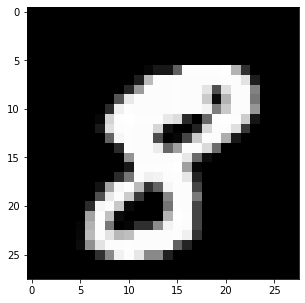

8


In [4]:
plt.figure(figsize=(5,5))
idx = 10

#Selecting the data point and converting it to matrix and then reshape
data_point = data.iloc[idx].as_matrix().reshape(28,28)

# Images can be shown using imshow
plt.imshow(data_point,cmap='gray')
plt.show()

print(label.iloc[idx])


2D visualization of MNIST dataset by using dimensionality reduction.

## Principal Component Analysis (PCA)
This analysis try to find the direction with the maximum spread and reduce the dimensionality by projecting data points to that directions. Below are the steps:

1) First standardized the data

2) Calculate the Co-variance matrix i.e A^T * A

3) Find the eigen values and the corresponding eigen vectors

4) Project the data points onto to the axis

One of the link tp follow for dimensionality reduction

http://colah.github.io/posts/2014-10-Visualizing-MNIST/

In [5]:
# Step1: Data standardization
data = data.head(1000)
label = label.head(1000)
from sklearn.preprocessing import StandardScaler

standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(1000, 784)


In [6]:
#Step2: Find the co-variance matrix which is A^T * A
data_sample = standardized_data

#matrix multiplication to find the covariance
covariance_data_matrix = np.matmul(data_sample.T, data_sample)

print('Shape of covariance matrix: ',covariance_data_matrix.shape)

Shape of covariance matrix:  (784, 784)


In [7]:
#Step3: find the top 2 eigen values (since we are reducing it to 2-dimensions) and the corresponding eigen vectors

from scipy.linalg import eigh

#the parameter 'eigvals' is defined, eigh function returns the eigen values and eigen vectors in ascending order
#the below will given only the top two vectors and values

values,vectors = eigh(covariance_data_matrix,eigvals=(782,783))

print('eigen vector shape: ',vectors.shape)

vectors = vectors.T

print('Updated eigen vector shape: ',vectors.shape)

#The vectors[0] represents the first principal component
#The vectors[1] represents the second principal component

eigen vector shape:  (784, 2)
Updated eigen vector shape:  (2, 784)


In [8]:
#Now we need to project the data points on to the 2 vectors
#using simple matrix multiplications

import matplotlib.pyplot as plt

new_data_points = np.matmul(vectors,data_sample.T)

print('The new data point shape after {} X {} is : {}'.format(vectors.shape,data_sample.T.shape,new_data_points.shape))

The new data point shape after (2, 784) X (784, 1000) is : (2, 1000)


In [9]:
# appending the labels to the new data points

new_data_points = np.vstack((new_data_points,label)).T

#Creating the new dataframe for ploting
reduce_DataFrame = pd.DataFrame(data=new_data_points,columns=('PC1','PC2','Label'))

print(reduce_DataFrame.head())

        PC1        PC2  Label
0 -6.065084  -5.166641    1.0
1  4.575014  18.631222    0.0
2 -2.468608  -7.647340    1.0
3  2.429640  -1.122921    4.0
4  5.547535  25.357884    0.0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


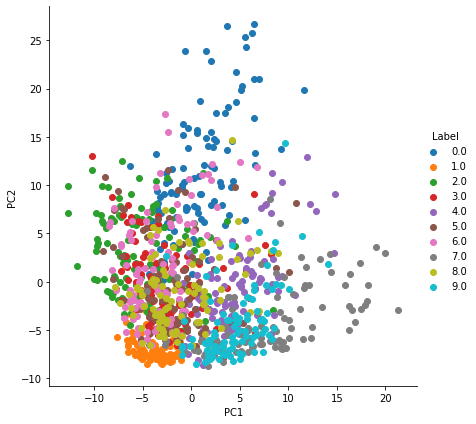

In [10]:
import seaborn as sns

sns.FacetGrid(reduce_DataFrame,hue='Label',size=6).map(plt.scatter,'PC1','PC2').add_legend()
plt.show()

## PCA Using Sklearn

In [0]:
from sklearn import decomposition

pca = decomposition.PCA()

In [12]:
#configuring the components with
#n_components
pca.n_components = 2
data_pca = pca.fit_transform(data_sample)

#the reduced shape
print('the reduced shape: ',data_pca.shape)

the reduced shape:  (1000, 2)


In [13]:
# appending the labels to the new data points

data_pca = np.vstack((data_pca.T,label)).T

#Creating the new dataframe for ploting
reduce_DataFrame = pd.DataFrame(data=data_pca,columns=('PC1','PC2','Label'))

print(reduce_DataFrame.head())

         PC1       PC2  Label
0  -5.166601 -6.065120    1.0
1  18.631203  4.574726    0.0
2  -7.647319 -2.468427    1.0
3  -1.122990  2.429015    4.0
4  25.357882  5.547541    0.0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


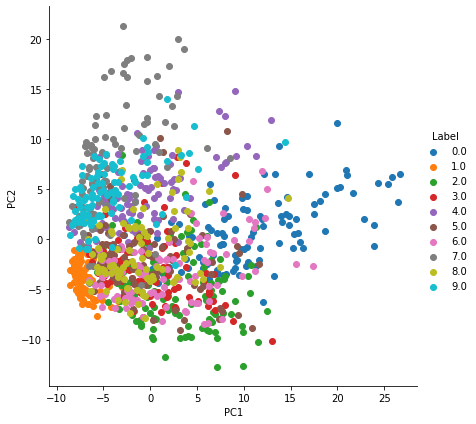

In [14]:
import seaborn as sns

sns.FacetGrid(reduce_DataFrame,hue='Label',size=6).map(plt.scatter,'PC1','PC2').add_legend()
plt.show()

## PCA For Dimensionality Reduction (not for visualization)

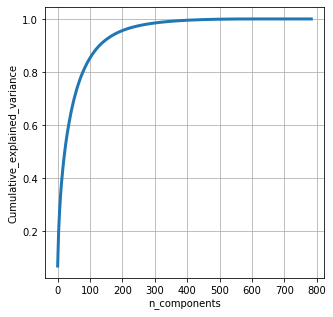

In [15]:
pca = decomposition.PCA()
pca.n_components = 784
data_pca = pca.fit_transform(data_sample)

variance_percentage_expalained = pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_var_explained = np.cumsum(variance_percentage_expalained)

#Plot PCA spectrum

plt.figure(figsize=(5,5))
plt.clf()
plt.plot(cum_var_explained,linewidth=3)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

## t-SNE (T-distributed stochastic Neighbourhood Embeding)

For dimensionalit reduction (mainly for visualization).

It uses the principal of projecting points from higher dimensions to lower dimensions, preserving the neighbourhood of the data points.
It has two main hyperparameters which are:

1) Step: No of iterations

2) Perplexity: it is the number of data points whose distance has to be preserved.

Read in more details for tsne:

https://distill.pub/2016/misread-tsne/

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


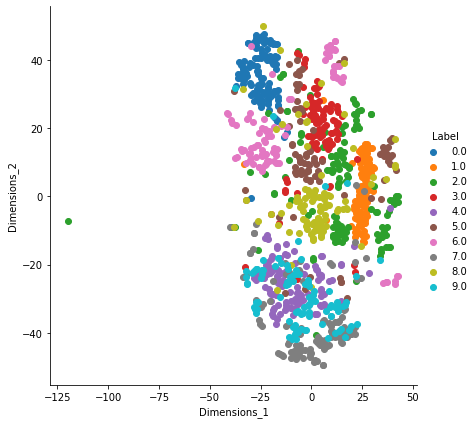

In [17]:
from sklearn.manifold import TSNE


model = TSNE(n_components=2,random_state=0)
# Parameters:
# n_components i.e the dimensions  = 2
# default perplexity is 30
# default learning rate = 200
# default maximum number of iterations = 1000

tsne_data = model.fit_transform(data_sample)

#creating dataframe which will help in ploting the data
tsne_data = np.vstack((tsne_data.T,label)).T
reduced_tsne_df = pd.DataFrame(tsne_data,columns=['Dimensions_1','Dimensions_2','Label'])

#ploting the results

sns.FacetGrid(reduced_tsne_df,hue='Label',size=6).map(plt.scatter,'Dimensions_1','Dimensions_2').add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


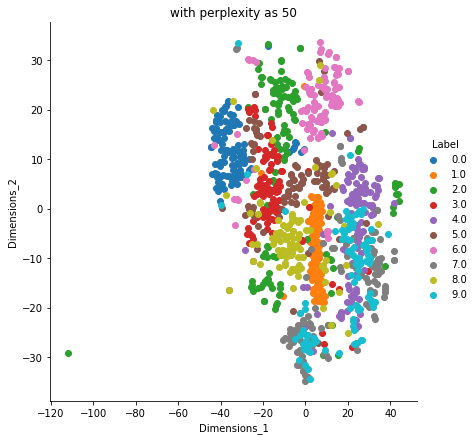

In [18]:
#with modified perplexity 

model = TSNE(n_components=2,random_state=0,perplexity=50)
# Parameters:
# n_components i.e the dimensions  = 2
# default perplexity is 50
# default learning rate = 200
# default maximum number of iterations = 1000

tsne_data = model.fit_transform(data_sample)

#creating dataframe which will help in ploting the data
tsne_data = np.vstack((tsne_data.T,label)).T
reduced_tsne_df = pd.DataFrame(tsne_data,columns=['Dimensions_1','Dimensions_2','Label'])

#ploting the results

sns.FacetGrid(reduced_tsne_df,hue='Label',size=6).map(plt.scatter,'Dimensions_1','Dimensions_2').add_legend()
plt.title('with perplexity as 50')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


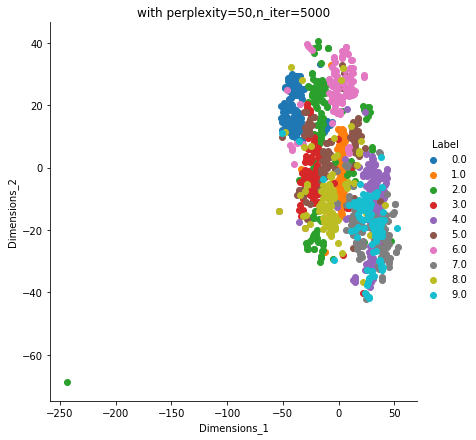

In [19]:
#with modified perplexity and number of iterations

model = TSNE(n_components=2,random_state=0,perplexity=50,n_iter=5000)
# Parameters:
# n_components i.e the dimensions  = 2
# default perplexity is 50
# default learning rate = 200
# default maximum number of iterations = 5000

tsne_data = model.fit_transform(data_sample)

#creating dataframe which will help in ploting the data
tsne_data = np.vstack((tsne_data.T,label)).T
reduced_tsne_df = pd.DataFrame(tsne_data,columns=['Dimensions_1','Dimensions_2','Label'])

#ploting the results

sns.FacetGrid(reduced_tsne_df,hue='Label',size=6).map(plt.scatter,'Dimensions_1','Dimensions_2').add_legend()
plt.title('with perplexity=50,n_iter=5000')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


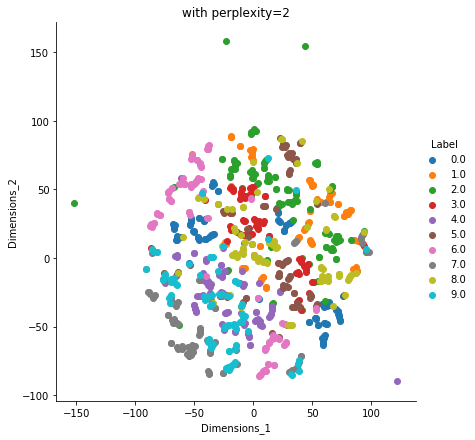

In [20]:
#with modified perplexity

model = TSNE(n_components=2,random_state=0,perplexity=2)
# Parameters:
# n_components i.e the dimensions  = 2
# default perplexity is 2
# default learning rate = 200
# default maximum number of iterations = 1000

tsne_data = model.fit_transform(data_sample)

#creating dataframe which will help in ploting the data
tsne_data = np.vstack((tsne_data.T,label)).T
reduced_tsne_df = pd.DataFrame(tsne_data,columns=['Dimensions_1','Dimensions_2','Label'])

#ploting the results

sns.FacetGrid(reduced_tsne_df,hue='Label',size=6).map(plt.scatter,'Dimensions_1','Dimensions_2').add_legend()
plt.title('with perplexity=2')
plt.show()